## 簡單線性迴歸

In [ ]:
import pandas
salary = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col = 0)

Populating the interactive namespace from numpy and matplotlib


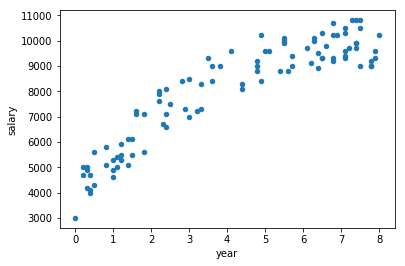

In [5]:
%pylab inline
salary.plot(kind='scatter', x = 'year', y= 'salary')

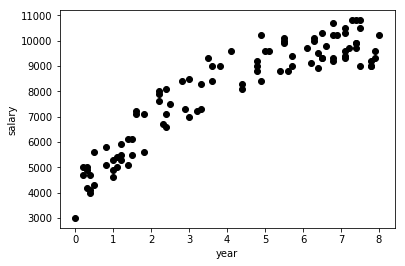

In [34]:
from matplotlib import pyplot as plt
X = salary[['year']]
Y = salary['salary']

plt.scatter(X['year'],Y,color='black')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
import numpy 
regr=LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
regr.coef_

array([712.59413615])

In [37]:
regr.intercept_

5049.009899813836

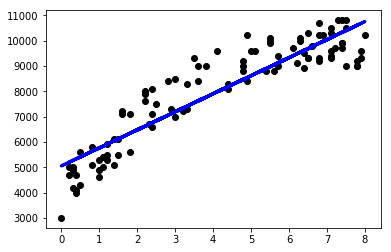

In [39]:

plt.scatter(X['year'],Y,color='black' )
Y_ = regr.predict(X)
plt.plot(X['year'],Y_,color='blue',linewidth=3)
plt.show()

## 二項式線性迴歸

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg=PolynomialFeatures(degree=2)
X_=poly_reg.fit_transform(X)
regr=LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
regr.coef_

array([   0.        , 1681.21265549, -119.70527702])

In [57]:
regr.intercept_

3896.80093117084

### 繪製二項式迴歸 (錯誤的做法)

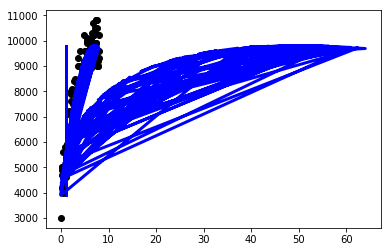

In [47]:
X2 = poly_reg.fit_transform(X)
Y_ = regr.predict(X2)
plt.scatter(X['year'], Y , color= 'black')
plt.plot(X2, Y_,color='blue',linewidth=3)

### 繪製二項式迴歸 (正確的做法)

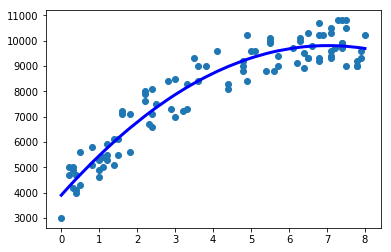

In [60]:
X2  = X.sort_values('year')
X2_ = poly_reg.fit_transform(X2)

plt.scatter(X['year'],Y)
plt.plot(X2, regr.predict(X2_), color = 'blue', linewidth = 3)
plt.show()

In [62]:
import numpy
X3 = poly_reg.fit_transform([[20]])
regr.predict(X3)

array([-10361.05676572])

In [86]:
#X2
extra_year = pandas.DataFrame(pandas.Series(range(9,21)), columns=  ['year'])
X2 = X2.append(extra_year)
X2.tail()

,year
7,16.0
8,17.0
9,18.0
10,19.0
11,20.0


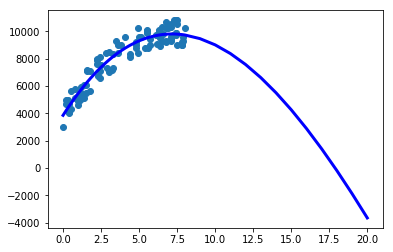

In [80]:
X2_ = poly_reg.fit_transform(X2)

plt.scatter(X['year'],Y)
plt.plot(X2, regr.predict(X2_), color = 'blue', linewidth = 3)
plt.show()

In [105]:
df = pandas.DataFrame([[9,10000],[10,12000],[11,11000], [12,13000], [20,16000]], columns = ['year', 'salary'])
salary2 = salary.append(df)

In [106]:
X = salary2[['year']]
Y = salary2['salary']

In [107]:
poly_reg=PolynomialFeatures(degree=2)
X_=poly_reg.fit_transform(X)
regr=LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

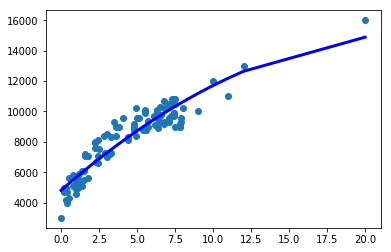

In [108]:
X2  = X.sort_values('year')
X2_ = poly_reg.fit_transform(X2)

plt.scatter(X['year'],Y)
plt.plot(X2, regr.predict(X2_), color = 'blue', linewidth = 3)
plt.show()

### 三項式迴歸

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg=PolynomialFeatures(degree=3)
X_=poly_reg.fit_transform(X)
regr=LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

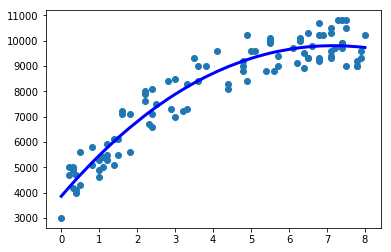

In [64]:
X3  = X.sort_values('year')
X3_ = poly_reg.fit_transform(X3)

plt.scatter(X['year'],Y)
plt.plot(X3, regr.predict(X3_), color = 'blue', linewidth = 3)
plt.show()

In [109]:
df = pandas.DataFrame([[9,10000],[10,12000],[11,11000], [12,13000], [20,16000]], columns = ['year', 'salary'])
salary2 = salary.append(df)

In [110]:
X = salary2[['year']]
Y = salary2['salary']

In [111]:
poly_reg=PolynomialFeatures(degree=3)
X_=poly_reg.fit_transform(X)
regr=LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

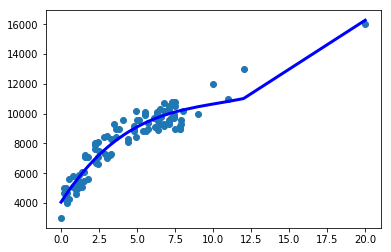

In [112]:
X3  = X.sort_values('year')
X3_ = poly_reg.fit_transform(X3)

plt.scatter(X['year'],Y)
plt.plot(X3, regr.predict(X3_), color = 'blue', linewidth = 3)
plt.show()

## 多元迴歸模型

In [113]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [116]:
set(df.Neighborhood.tolist())

{'East', 'North', 'West'}

In [128]:
brick = pandas.get_dummies(df['Brick'])
neighborhood = pandas.get_dummies(df['Neighborhood'])
#neighborhood
house = pandas.concat([df, brick['Yes'], neighborhood[['North', 'East']]], axis = 1)
del house['Home']
del house['Brick']
del house['Neighborhood']

In [130]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,North,East
0,114300,1790,2,2,2,0,0,1
1,114200,2030,4,2,3,0,0,1
2,114800,1740,3,2,1,0,0,1
3,94700,1980,3,2,3,0,0,1
4,119800,2130,3,3,3,0,0,1


In [131]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
X=house[['SqFt','Bedrooms','Bathrooms','Offers','Yes','East','North']]
Y=house['Price'].values

regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
predicted = regr.predict(X)

In [134]:
#predicted

## 評估多元迴歸模型

In [135]:
import statsmodels.api as sm
X2=sm.add_constant(X)
est=sm.OLS(Y,X2)
est2=est.fit()
print(est2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 05 May 2018   Prob (F-statistic):           8.25e-50
Time:                        12:22:12   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

In [138]:
predictorcols = X.columns

In [145]:
import itertools
list(itertools.combinations(predictorcols,2))

[('SqFt', 'Bedrooms'),
 ('SqFt', 'Bathrooms'),
 ('SqFt', 'Offers'),
 ('SqFt', 'Yes'),
 ('SqFt', 'East'),
 ('SqFt', 'North'),
 ('Bedrooms', 'Bathrooms'),
 ('Bedrooms', 'Offers'),
 ('Bedrooms', 'Yes'),
 ('Bedrooms', 'East'),
 ('Bedrooms', 'North'),
 ('Bathrooms', 'Offers'),
 ('Bathrooms', 'Yes'),
 ('Bathrooms', 'East'),
 ('Bathrooms', 'North'),
 ('Offers', 'Yes'),
 ('Offers', 'East'),
 ('Offers', 'North'),
 ('Yes', 'East'),
 ('Yes', 'North'),
 ('East', 'North')]

## 實作 step AIC

In [153]:

AICs = {}
for k in range(1, len(predictorcols) + 1):
    #print(k)
    for variables in itertools.combinations(predictorcols,k):
        predictors=X[list(variables)]
        predictors2=sm.add_constant(predictors)
        est=sm.OLS(Y,predictors2)
        res=est.fit()
        AICs[variables] = res.aic

In [158]:
from collections import Counter
c = Counter(AICs)
c.most_common()[::-1][0:3]

[(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
  2729.3189814012494),
 (('SqFt', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'), 2734.639925628371),
 (('SqFt', 'Bedrooms', 'Offers', 'Yes', 'East', 'North'), 2741.3156609981506)]

## 建立一模型評估房價

### 蒐集591 整層住家的租屋資訊

In [172]:
import requests
import pandas
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.139 Safari/537.36'  
}
house_all = []
for i in range(0, int(717/30) + 1):
    recnum = i * 30
    res = requests.get('https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=717'.format(recnum), headers = headers)
    df = pandas.DataFrame(res.json()['data']['data'])
    df.columns
    df = df[['area','living','layout','floor', 'allfloor', 'price']]
    house_all.append(df)

In [173]:
housedf = pandas.concat(house_all)

In [175]:
housedf.to_csv('20180505housedf.csv', encoding = 'utf-8-sig')

In [176]:
housedf = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/20180505housedf.csv', index_col = 0)

### 房屋資料清整

In [178]:
housedf['price'] = housedf['price'].map(lambda e: int(e.replace(',','')) )
housedf[['bedroom','living_room', 'bathroom']] = housedf['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [185]:
living_type = []
for ele in housedf['living'].tolist():
    if not pandas.isnull(ele):
        living_type.extend(ele.split(','))
set(living_type)

{'advstore', 'depart', 'hospital', 'market', 'night', 'park', 'school'}

In [186]:
for col in set(living_type):
    housedf[col] = 0

In [200]:
housedf.reset_index(inplace=True)    

In [201]:
for rec in housedf.iterrows():
    if not pandas.isnull(rec[1]['living']):
        for field in rec[1]['living'].split(','):
            housedf.loc[rec[0], field] = 1

In [203]:
del housedf['index']
del housedf['living']
del housedf['layout']

In [221]:
housedf.dropna(inplace=True)

In [218]:
housedf['bedroom'] = housedf['bedroom'].astype(int)
housedf['living_room'] = housedf['living_room'].astype(int)
housedf['bathroom'] = housedf['bathroom'].astype(int)


In [219]:
housedf.head()

,area,floor,allfloor,price,bedroom,living_room,bathroom,school,night,park,advstore,depart,market,hospital
0,14.0,12,14,36000,1,2,1,1,1,1,1,1,1,1
1,23.0,2,4,24009,2,1,1,1,1,1,1,1,1,1
2,31.0,7,7,32040,2,1,1,1,1,1,1,1,1,1
3,22.0,4,5,34000,2,1,1,0,0,0,0,0,0,0
4,60.0,13,15,130000,4,2,2,1,0,1,1,1,1,0


In [220]:
housedf.columns

Index(['area', 'floor', 'allfloor', 'price', 'bedroom', 'living_room',
       'bathroom', 'school', 'night', 'park', 'advstore', 'depart', 'market',
       'hospital'],
      dtype='object')

### 建立迴歸模型

In [222]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
X=housedf[['area', 'floor', 'allfloor', 'bedroom', 'living_room',
       'bathroom', 'school', 'night', 'park', 'advstore', 'depart', 'market',
       'hospital']]
Y=housedf['price'].values

regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [226]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est=sm.OLS(Y,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     136.0
Date:                Sat, 05 May 2018   Prob (F-statistic):          2.98e-181
Time:                        14:50:15   Log-Likelihood:                -8142.1
No. Observations:                 712   AIC:                         1.631e+04
Df Residuals:                     698   BIC:                         1.638e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -319.6287   4518.012     -0.071      

### 篩選建立模型使用的變數

In [227]:
predictorcols = X.columns

AICs = {}
for k in range(1, len(predictorcols) + 1):
    #print(k)
    for variables in itertools.combinations(predictorcols,k):
        predictors=X[list(variables)]
        predictors2=sm.add_constant(predictors)
        est=sm.OLS(Y,predictors2)
        res=est.fit()
        AICs[variables] = res.aic

In [228]:
from collections import Counter
c = Counter(AICs)
c.most_common()[::-1][0:3]

[(('area', 'allfloor', 'bedroom', 'night', 'depart'), 16299.327673057394),
 (('area', 'allfloor', 'bedroom', 'depart', 'market'), 16300.022691531243),
 (('area', 'allfloor', 'bedroom', 'night', 'depart', 'market'),
  16300.638652306474)]

### 產生模型以及預測結果

In [240]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
X=housedf[['area', 'allfloor', 'bedroom',  'night','depart']]
#X=housedf[['area', 'allfloor', 'bedroom']]
Y=housedf['price'].values

regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [241]:
regr.predict([[23,4,2,1,0]])

array([26088.47087587])

### 保存以及讀取模型

In [242]:
from sklearn.externals import joblib
joblib.dump(regr, 'house.pkl') 

['house.pkl']

In [243]:
clf = joblib.load('house.pkl') 

In [244]:
clf.predict([[23,4,2,1,0]])

array([26088.47087587])

## 建立決策樹

In [245]:
from sklearn.datasets import load_iris
iris=load_iris()

In [246]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [248]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [249]:
iris.data.shape

(150, 4)

In [250]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [252]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data,iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [254]:
clf.predict([[5.0, 3, 0.5, 0.1]])

array([0])

In [255]:
clf.classes_

array([0, 1, 2])

In [257]:
predicted = clf.predict(iris.data)

In [258]:
tree.export_graphviz(clf,out_file='tree.dot')

In [261]:
X=iris.data[:,[2,3]]
y=iris.target

clf=tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [260]:
tree.export_graphviz(clf,out_file='tree2.dot')

In [262]:
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

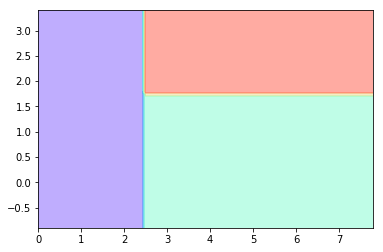

In [263]:
plt.plot()
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.rainbow)
plt.show()

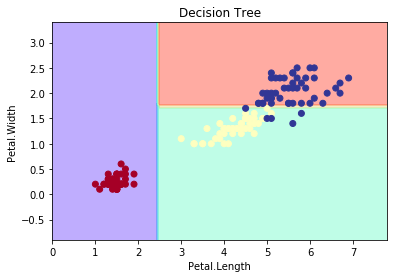

In [264]:
plt.plot()
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.rainbow)

plt.scatter(X[:,0],X[:,1],c=y,alpha=1,cmap=plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

## 建立邏輯式迴歸

In [266]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
X=iris.data[:,[2,3]]
y = iris.target
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

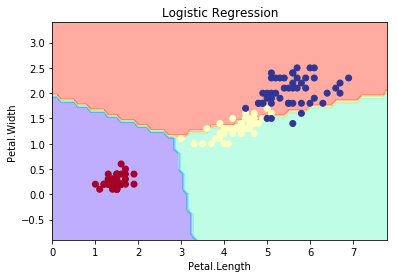

In [267]:
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

#plt.plot()
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.rainbow)

plt.scatter(X[:,0],X[:,1],c=y,alpha=1,cmap=plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

In [268]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
X= iris.data[50:150,[2,3]]
y = iris.target[50:150]
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

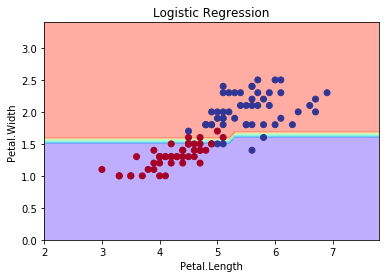

In [269]:
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

#plt.plot()
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.rainbow)

plt.scatter(X[:,0],X[:,1],c=y,alpha=1,cmap=plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

## 決定層數

In [272]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from pprint import pprint
X = iris.data
y = iris.target

depth = []
for i in range(1,10):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=10)
    depth.append((i,scores.mean()))
print(depth)

[(1, 0.6666666666666667), (2, 0.9533333333333334), (3, 0.96), (4, 0.9533333333333334), (5, 0.9533333333333334), (6, 0.96), (7, 0.96), (8, 0.96), (9, 0.96)]


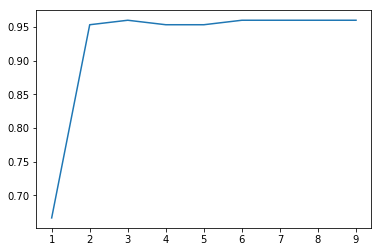

In [276]:
import numpy as np
nd = np.array(depth)
plt.plot(nd[:,0], nd[:,1])

## 支持向量機

In [277]:
X=iris.data[0:100,[2,3]]
y=iris.target[0:100]

In [278]:
from sklearn.svm import SVC
clf1=SVC(kernel="linear")
clf1.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [279]:
clf2=LogisticRegression()
clf2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [280]:
def plot_estimator(estimator,X,y):
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    
    Z=estimator.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    #plt.plot()
    plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.RdYlBu)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

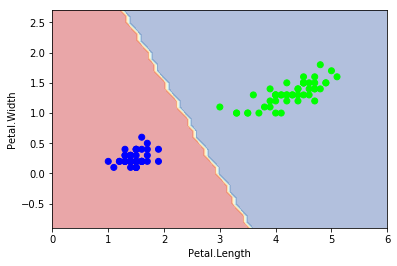

In [282]:
plot_estimator(clf1, X, y)

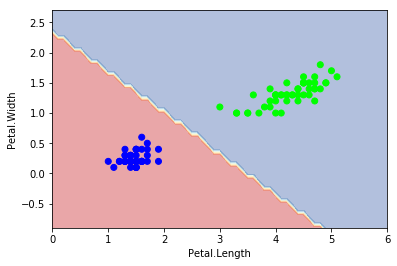

In [283]:
plot_estimator(clf2, X, y)

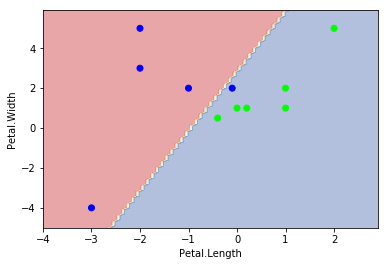

In [285]:
data=np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1],[1,1,1],[-0.4,0.5,1],[2,5,1]])
X=data[:,:2]
Y=data[:,2]
# Large Margin
clf=SVC(C=1.0,kernel='linear')
clf.fit(X,Y)
plot_estimator(clf,X,Y)

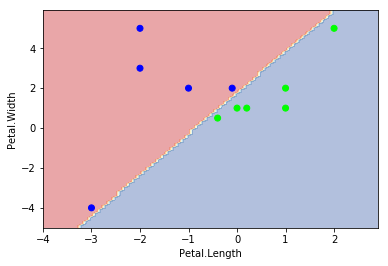

In [286]:
# Narrow Margin
clf=SVC(C=100000,kernel='linear')
clf.fit(X,Y)
plot_estimator(clf,X,Y)

In [288]:
X=iris.data[0:100,[2,3]]
y=iris.target[0:100]

In [289]:
clf1=SVC(kernel="rbf")
clf1.fit(X,y)

clf2=SVC(kernel="poly")
clf2.fit(X,y)

clf3=SVC(kernel="linear")
clf3.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

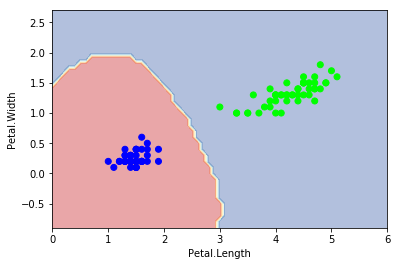

In [292]:
plot_estimator(clf1,X,y)

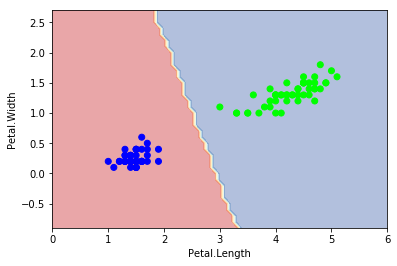

In [293]:
plot_estimator(clf2,X,y)

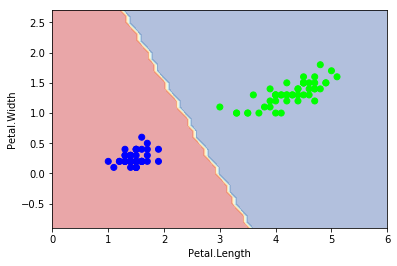

In [294]:
plot_estimator(clf3,X,y)

In [299]:
X=iris.data[:,[2,3]]
y=iris.target

In [300]:
clf1=SVC(kernel="rbf")
clf1.fit(X,y)

clf2=SVC(kernel="poly")
clf2.fit(X,y)

clf3=SVC(kernel="linear")
clf3.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

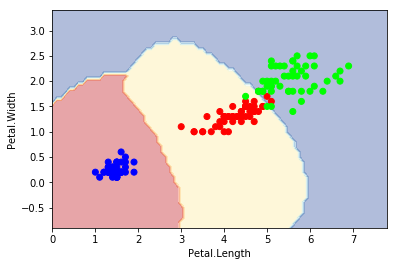

In [301]:
plot_estimator(clf1,X,y)

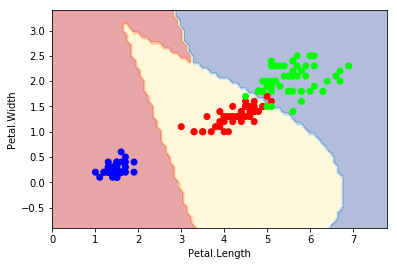

In [302]:
plot_estimator(clf2,X,y)

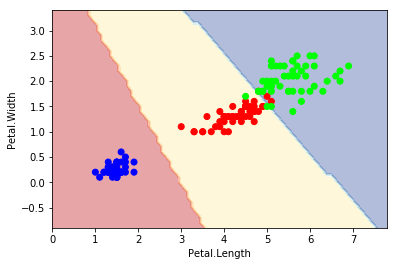

In [303]:
plot_estimator(clf3,X,y)

## 隨機森林

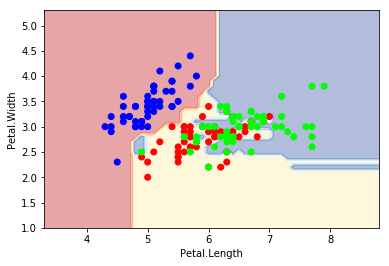

In [305]:
from sklearn.ensemble import RandomForestClassifier
iris=load_iris()
X=iris.data[:,[0,1]]
y=iris.target
clf=RandomForestClassifier(n_estimators=100,criterion="entropy")
clf.fit(X,y)
plot_estimator(clf,X,y)

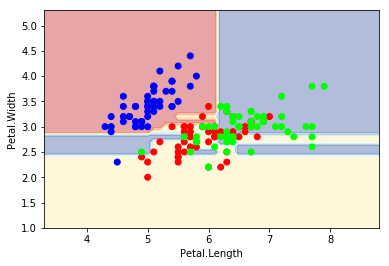

In [307]:
clf=RandomForestClassifier(n_estimators=1,criterion="entropy")
clf.fit(X,y)
plot_estimator(clf,X,y)

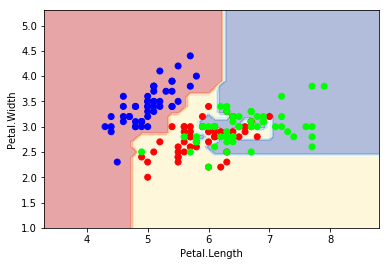

In [308]:
clf=RandomForestClassifier(n_estimators=10,criterion="entropy")
clf.fit(X,y)
plot_estimator(clf,X,y)

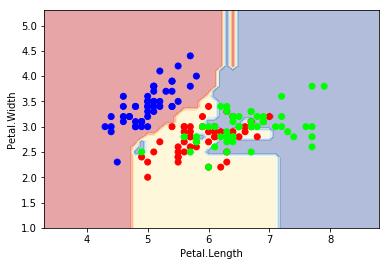

In [309]:
clf=RandomForestClassifier(n_estimators=100,criterion="entropy")
clf.fit(X,y)
plot_estimator(clf,X,y)

In [310]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf1=SVC(kernel="rbf")
clf1.fit(X,y)

clf2=DecisionTreeClassifier()
clf2.fit(X,y)

clf3=RandomForestClassifier(n_estimators=10,criterion="entropy")
clf3.fit(X,y)

clf4=LogisticRegression()
clf4.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

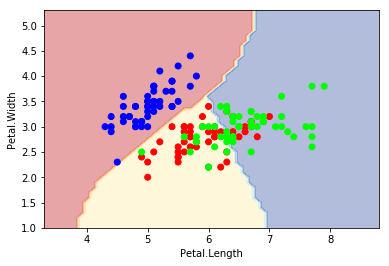

In [311]:
plot_estimator(clf1,X,y)

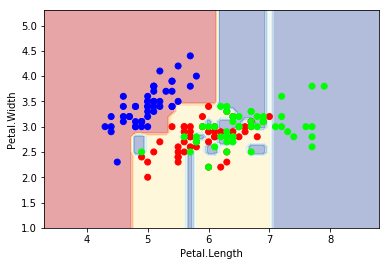

In [312]:
plot_estimator(clf2,X,y)

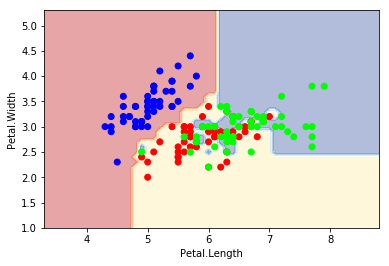

In [313]:
plot_estimator(clf3,X,y)

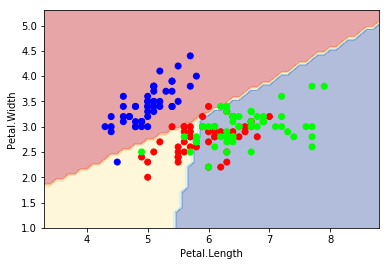

In [314]:
plot_estimator(clf4,X,y)